### Notebook 2: Daylily Hybridizer Career Analysis
## Understanding Trends in the Hybridizing Community
An exploration of 100,000+ daylily variety and their 5,000+ hybridizers

- Extract hybridizer career spans (first/last introduction years)
- Calculate varieties per hybridizer over time
- Identify most prolific hybridizers
- Measure number of unique hybridizers by year
- Identify most prolific hybridizer by num of intros per year
- Meausure average number of introduction per hybridizer by year and decade
- Analyze trait improvement patterns by era


In [17]:
# Import
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Connect to database and load data
conn = sqlite3.connect('daylilies.db')
df = pd.read_sql_query("SELECT * FROM daylilies", conn)
conn.close()

# Display basic information about our dataset
print("Dataset Overview:")
print(f"Total records: {len(df):,}")
print(f"Date range: {df['year'].min()} - {df['year'].max()}")
print(f"Unique hybridizers: {df['hybridizer'].nunique():,}")
print(f"Total varieties: {len(df):,}")

# Show sample data
print("\nSample of the data:")
display(df.head())

Dataset Overview:
Total records: 101,406
Date range: 1762 - 2024
Unique hybridizers: 5,334
Total varieties: 101,406

Sample of the data:


,url,name,hybridizer,year,scape_height,bloom_size,bloom_season,ploidy,foliage_type,fragrance,...,bud_count,branches,seedling_num,color_description,parentage,image_url,form,sculpting,notes,rebloom
0,https://daylilydatabase.org/detail.php?id=1959...,Fairest Gwendol,Kirchhoff-D.,2022,28.0,5.5,Early,Tetraploid,Evergreen,Very Fragrant,...,14.0,3.0,08-38Pi,"Clear, coral pink with deeply beveled midribs ...",(sdlg × (sdlg x Clark Gable)),https://daylilydatabase.org/AHSPhoto/F/Fairest...,Double 99%,Pleated,None,1
1,https://daylilydatabase.org/detail.php?id=2014...,Margaret Gellatly Memorial,Gellatly,2024,28.0,7.0,Extra Early,Diploid,Dormant,Fragrant,...,20.0,4.0,TALxYPS01,"Yellow with red stippled, broken overlay, recu...",(Tequila and Lime × Striped Chameleon),https://daylilydatabase.org/AHSPhoto/M/Margare...,Unusual FormCrispate,Cristated,None,1
2,https://daylilydatabase.org/detail.php?id=1982...,Parallax Effect,Turk-Harmon,2023,18.0,6.5,Midseason,Tetraploid,Semi-Evergreen,Fragrant,...,10.0,4.0,19-K1-iv,"Lilac purple with faded lilac sepals, yellow t...",(Aqua Tech × Neutron Star),https://daylilydatabase.org/AHSPhoto/P/Paralla...,Unusual FormCrispate,Pleated,None,1
3,https://daylilydatabase.org/detail.php?id=1788...,L'Excentrique du Lac,Niquet,2015,38.0,8.0,Midseason,Tetraploid,Semi-Evergreen,Fragrant,...,12.0,2.0,11-25 A,"red self, twisted sepals, lime to green throat",(Rolling Raven × La Vie en Rose du Lac),https://daylilydatabase.org/AHSPhoto/L/lexcent...,Unusual FormCrispate,Pleated,None,0
4,https://daylilydatabase.org/detail.php?id=1821...,Papa,Rocheleau-J.,2016,30.0,6.0,Midseason,Tetraploid,Semi-Evergreen,Fragrant,...,20.0,3.0,10201,"red burgundy with darker burgundy eye, white e...",(Thunder and Lightning × Grand Cru),https://daylilydatabase.org/AHSPhoto/P/papa.jpg,Unusual FormCrispate,Pleated,None,0


### Community Growth and Decline
How has the hybridizing community changed over time?

In [19]:
# Calculate when each hybridizer started and stopped
hybridizer_spans = df.groupby('hybridizer').agg({
    'year': ['min', 'max']
}).reset_index()

hybridizer_spans.columns = ['hybridizer', 'start_year', 'last_year']

# Group by decades
hybridizer_spans['start_decade'] = (hybridizer_spans['start_year'] // 10) * 10
hybridizer_spans['end_decade'] = (hybridizer_spans['last_year'] // 10) * 10

# Count entries and exits by decade
entries_by_decade = hybridizer_spans['start_decade'].value_counts().sort_index()
exits_by_decade = hybridizer_spans['end_decade'].value_counts().sort_index()

print("Community Changes by Decade:")
print("\nNew Hybridizers Entering:")
display(entries_by_decade)
print("\nHybridizers Exiting:")
display(exits_by_decade)

Community Changes by Decade:

New Hybridizers Entering:


start_decade
1760       2
1800       1
1830       1
1890       5
1900       9
1910       8
1920      10
1930      46
1940     124
1950     372
1960     501
1970     460
1980     452
1990     625
2000    1141
2010    1107
2020     470
Name: count, dtype: int64


Hybridizers Exiting:


end_decade
1760       2
1830       1
1890       4
1900       4
1910       5
1920      11
1930      31
1940      63
1950     280
1960     453
1970     406
1980     423
1990     572
2000     891
2010    1121
2020    1067
Name: count, dtype: int64

In [20]:
# Decades
all_decades = sorted(set(entries_by_decade.index) | set(exits_by_decade.index))
print(f"Decades: {all_decades}")

# Fill in missing decades with 0
entries_by_decade = entries_by_decade.reindex(all_decades, fill_value=0)
exits_by_decade = exits_by_decade.reindex(all_decades, fill_value=0)

Decades: [1760, 1800, 1830, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


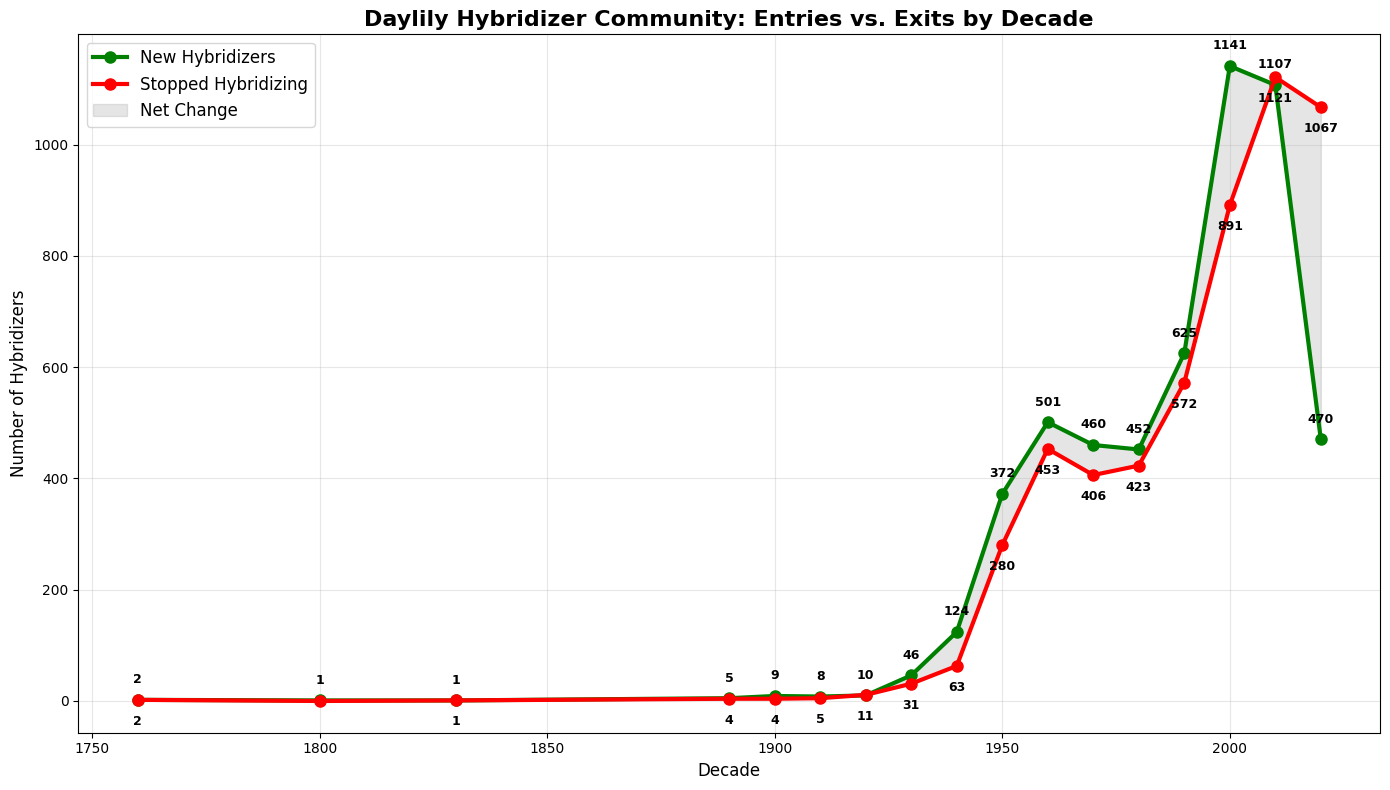

In [21]:
# Create visualization of community entry/exit patterns
plt.figure(figsize=(14, 8))

# Plot new entries and exits
plt.plot(entries_by_decade.index, entries_by_decade.values, 
         marker='o', linewidth=3, markersize=8, label='New Hybridizers', color='green')
plt.plot(exits_by_decade.index, exits_by_decade.values, 
         marker='o', linewidth=3, markersize=8, label='Stopped Hybridizing', color='red')

# Add value labels on points 
for x, y in zip(entries_by_decade.index, entries_by_decade.values):
    if y > 0:  # Only label non-zero values
        plt.annotate(str(int(y)), (x, y), textcoords="offset points", 
                    xytext=(0,12), ha='center', fontsize=9, fontweight='bold')
for x, y in zip(exits_by_decade.index, exits_by_decade.values):
    if y > 0:  # Only label non-zero values
        plt.annotate(str(int(y)), (x, y), textcoords="offset points", 
                    xytext=(0,-18), ha='center', fontsize=9, fontweight='bold')

# Area between lines
plt.fill_between(entries_by_decade.index, 
                 entries_by_decade.values, 
                 exits_by_decade.values, 
                 alpha=0.2, color='gray', label='Net Change')

plt.title('Daylily Hybridizer Community: Entries vs. Exits by Decade', fontsize=16, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Hybridizers', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [22]:
# Calculate net changes
print("\nNet Change by Decade (New - Exited):")
for decade in all_decades:
    new = entries_by_decade[decade]
    left = exits_by_decade[decade]
    net_change = new - left
    print(f"{decade}s: {net_change:+} hybridizers (New: {new}, Exited: {left})")


Net Change by Decade (New - Exited):
1760s: +0 hybridizers (New: 2, Exited: 2)
1800s: +1 hybridizers (New: 1, Exited: 0)
1830s: +0 hybridizers (New: 1, Exited: 1)
1890s: +1 hybridizers (New: 5, Exited: 4)
1900s: +5 hybridizers (New: 9, Exited: 4)
1910s: +3 hybridizers (New: 8, Exited: 5)
1920s: -1 hybridizers (New: 10, Exited: 11)
1930s: +15 hybridizers (New: 46, Exited: 31)
1940s: +61 hybridizers (New: 124, Exited: 63)
1950s: +92 hybridizers (New: 372, Exited: 280)
1960s: +48 hybridizers (New: 501, Exited: 453)
1970s: +54 hybridizers (New: 460, Exited: 406)
1980s: +29 hybridizers (New: 452, Exited: 423)
1990s: +53 hybridizers (New: 625, Exited: 572)
2000s: +250 hybridizers (New: 1141, Exited: 891)
2010s: -14 hybridizers (New: 1107, Exited: 1121)
2020s: -597 hybridizers (New: 470, Exited: 1067)


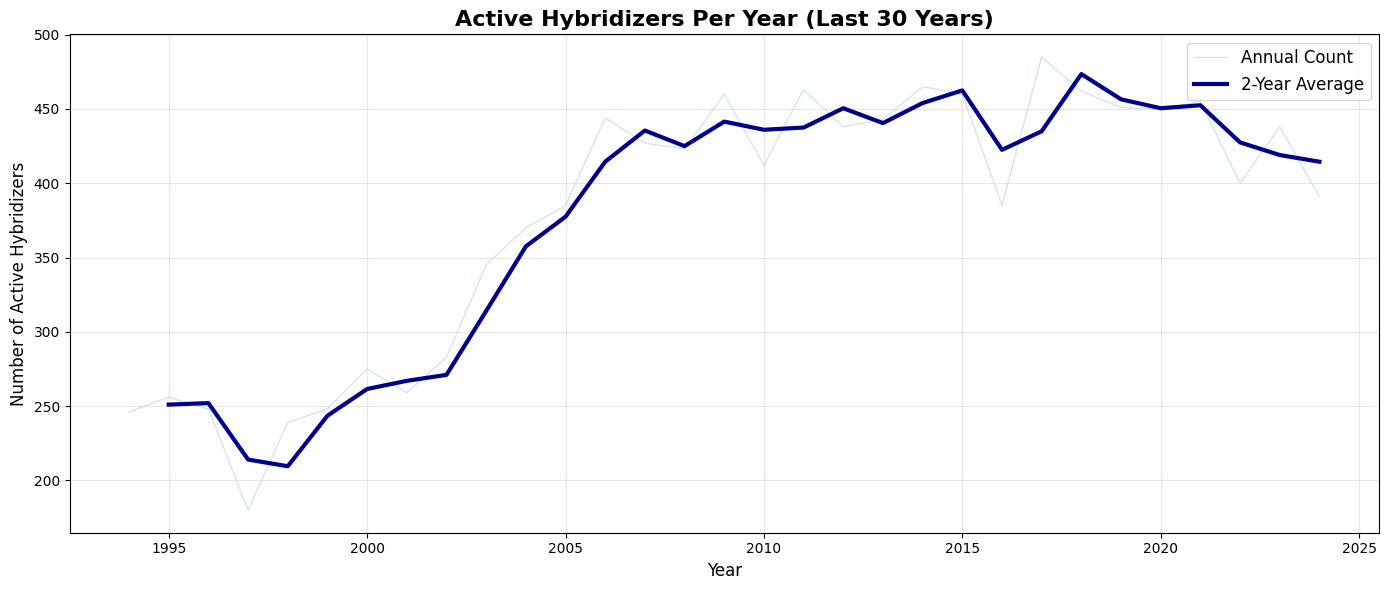

Peak activity: 485.0 hybridizers in 2017.0
Most recent: 391.0 hybridizers in 2024.0
Change from peak: -94.0 hybridizers


In [23]:
# number of active hybridizers for the last 30 years 
recent_years = df[df['year'] >= df['year'].max() - 30]
active_per_year = recent_years.groupby('year')['hybridizer'].nunique().reset_index()
active_per_year.columns = ['year', 'active_hybridizers']

# 2-year rolling average
active_per_year['rolling_avg'] = active_per_year['active_hybridizers'].rolling(window=2, center=True).mean()

# create vis
plt.figure(figsize=(14, 6))
plt.plot(active_per_year['year'], active_per_year['active_hybridizers'], 
         alpha=0.6, label='Annual Count', color='lightblue', linewidth=1)
plt.plot(active_per_year['year'], active_per_year['rolling_avg'], 
         linewidth=3, label='2-Year Average', color='darkblue')

plt.title('Active Hybridizers Per Year (Last 30 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Active Hybridizers', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Key statistics
peak_year = active_per_year.loc[active_per_year['active_hybridizers'].idxmax()]
recent_year = active_per_year.iloc[-1]

print(f"Peak activity: {peak_year['active_hybridizers']} hybridizers in {peak_year['year']}")
print(f"Most recent: {recent_year['active_hybridizers']} hybridizers in {recent_year['year']}")
print(f"Change from peak: {recent_year['active_hybridizers'] - peak_year['active_hybridizers']:+} hybridizers")

Key Finding: Community in Decline
The daylily hybridizing community reached its peak in the 2000s with over 1,100 new entries. Since 2010, exits have consistently outpaced new entries, resulting in a net loss of nearly 600 hybridizers in the 2020s alone.

### Individual Achievements
Who are the most successful hybridizers and what sets them apart?

In [24]:
# Lifetime statistics for each hybridizer
lifetime_stats = df.groupby('hybridizer').agg({
    'name': 'count',  # total introductions
    'year': ['min', 'max']  # career span
}).reset_index()

lifetime_stats.columns = ['hybridizer', 'total_introductions', 'first_year', 'last_year']
lifetime_stats['career_span'] = lifetime_stats['last_year'] - lifetime_stats['first_year'] + 1
lifetime_stats['avg_per_year'] = (lifetime_stats['total_introductions'] / 
                                 lifetime_stats['career_span']).round(1)

# Sort by total introductions
lifetime_stats = lifetime_stats.sort_values('total_introductions', ascending=False)

print("Top 15 Most Prolific Hybridizers:")
display(lifetime_stats.head(15))

# Interesting statistics
total_hybridizers = len(lifetime_stats)
elite_hybridizers = len(lifetime_stats[lifetime_stats['total_introductions'] >= 100])

print(f"\nCommunity Statistics:")
print(f"Total hybridizers: {total_hybridizers:,}")
print(f"Elite hybridizers (100+ varieties): {elite_hybridizers} ({elite_hybridizers/total_hybridizers*100:.1f}%)")
print(f"Median introductions per hybridizer: {lifetime_stats['total_introductions'].median()}")

Top 15 Most Prolific Hybridizers:


,hybridizer,total_introductions,first_year,last_year,career_span,avg_per_year
5090,Wild,1837,1931,2003,73,25.2
3963,Russell,1185,1937,1967,31,38.2
3242,Munson-R.W.,1017,1952,2001,50,20.3
1802,Hanson-C.,912,1987,2024,38,24.0
4407,Stamile,869,1982,2024,43,20.2
1620,Gossard,809,2000,2024,25,32.4
3987,Salter,756,1985,2022,38,19.9
2513,Krekler,744,1965,1987,23,32.3
2416,Kirchhoff-D.,733,1976,2023,48,15.3
1797,Hansen-D.,715,1999,2024,26,27.5



Community Statistics:
Total hybridizers: 5,334
Elite hybridizers (100+ varieties): 219 (4.1%)
Median introductions per hybridizer: 3.0


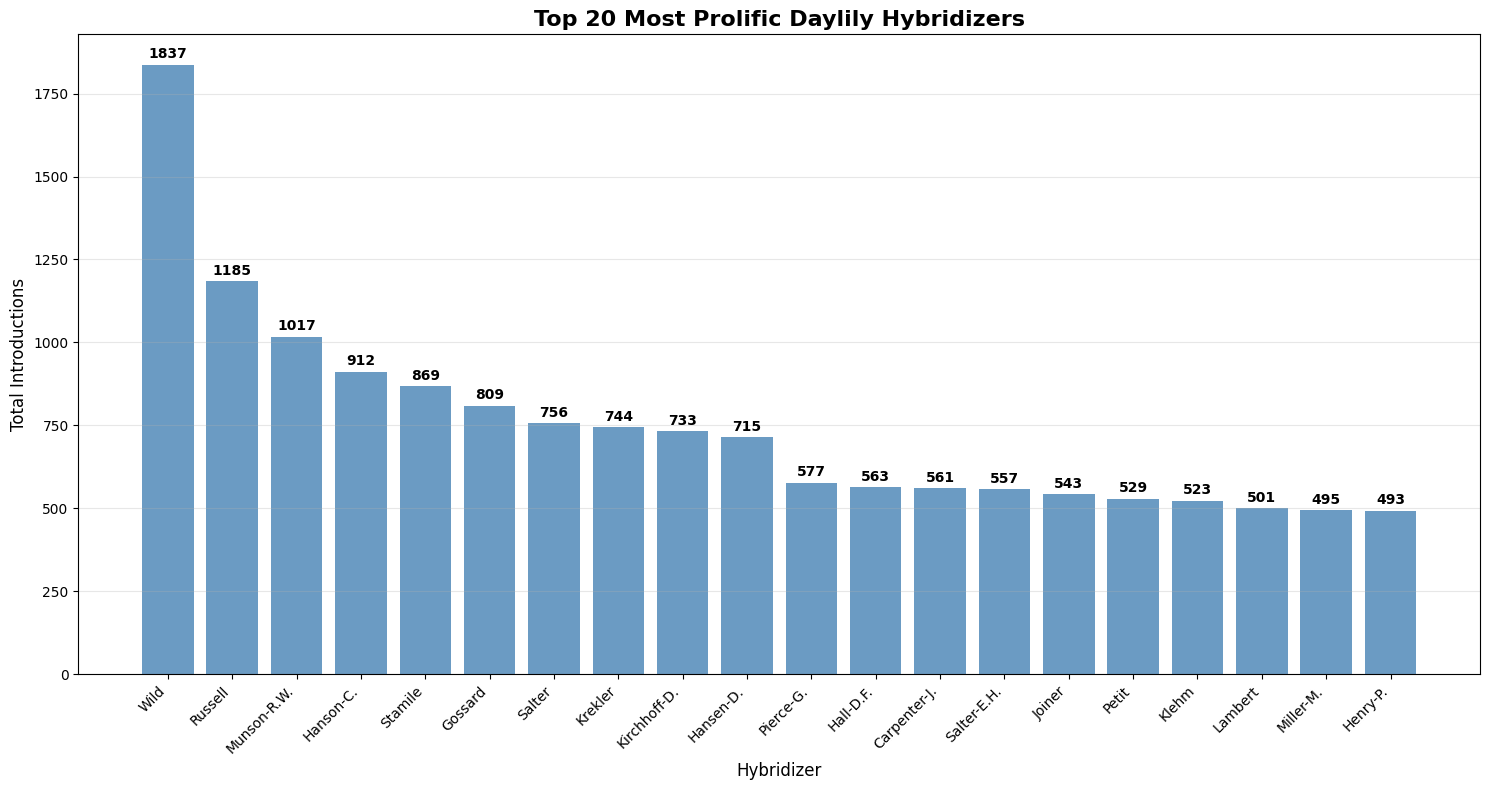

In [25]:
# Top 20 hybridizers
plt.figure(figsize=(15, 8))
top_20 = lifetime_stats.head(20)

bars = plt.bar(top_20['hybridizer'], top_20['total_introductions'], 
               color='steelblue', alpha=0.8)

# Labels on bars
for bar, value in zip(bars, top_20['total_introductions']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(int(value)), ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Prolific Daylily Hybridizers', fontsize=16, fontweight='bold')
plt.xlabel('Hybridizer', fontsize=12)
plt.ylabel('Total Introductions', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [26]:
# Most productive hybridizer by year
annual_records = df.groupby(['year', 'hybridizer']).size().reset_index()
annual_records.columns = ['year', 'hybridizer', 'introductions']

# Yearly champions
yearly_champions = annual_records.loc[annual_records.groupby('year')['introductions'].idxmax()]

print("Single-Year Productivity Records:")
top_years = annual_records.sort_values('introductions', ascending=False).head(10)
display(top_years)

# Most frequent annual champions
champion_counts = yearly_champions['hybridizer'].value_counts()
print("\nMost Frequent Annual Champions:")
display(champion_counts.head(10))

Single-Year Productivity Records:


,year,hybridizer,introductions
6106,1987,Krekler,395
6198,1987,Wild,269
9874,2003,Klehm,210
471,1949,Russell,168
445,1949,Gersdorff,163
6403,1988,Wild,160
2491,1966,Krekler,159
6591,1989,Wild,156
315,1946,Perry,148
271,1944,Russell,136



Most Frequent Annual Champions:


hybridizer
Wild           13
Russell         9
Yeld            7
Hall-D.F.       5
Pierce-G.       5
Perry           5
Munson-R.W.     4
Mueller         4
DCH             4
Krekler         3
Name: count, dtype: int64

A small elite group dominates the field. Wild leads with 1,837 varieties over 73 years. Only 4.1% of hybridizers have introduced 100+ varieties, yet they account for the majority of all introductions. Krekler holds the single-year record with 395 introductions in 1987.

### A Hybridizers Career
What does a typical hybridizer's career look like?

Career Length Statistics:
count    5334.000000
mean        5.986127
std         8.414659
min         1.000000
25%         1.000000
50%         1.000000
75%         8.000000
max       146.000000
Name: career_span, dtype: float64


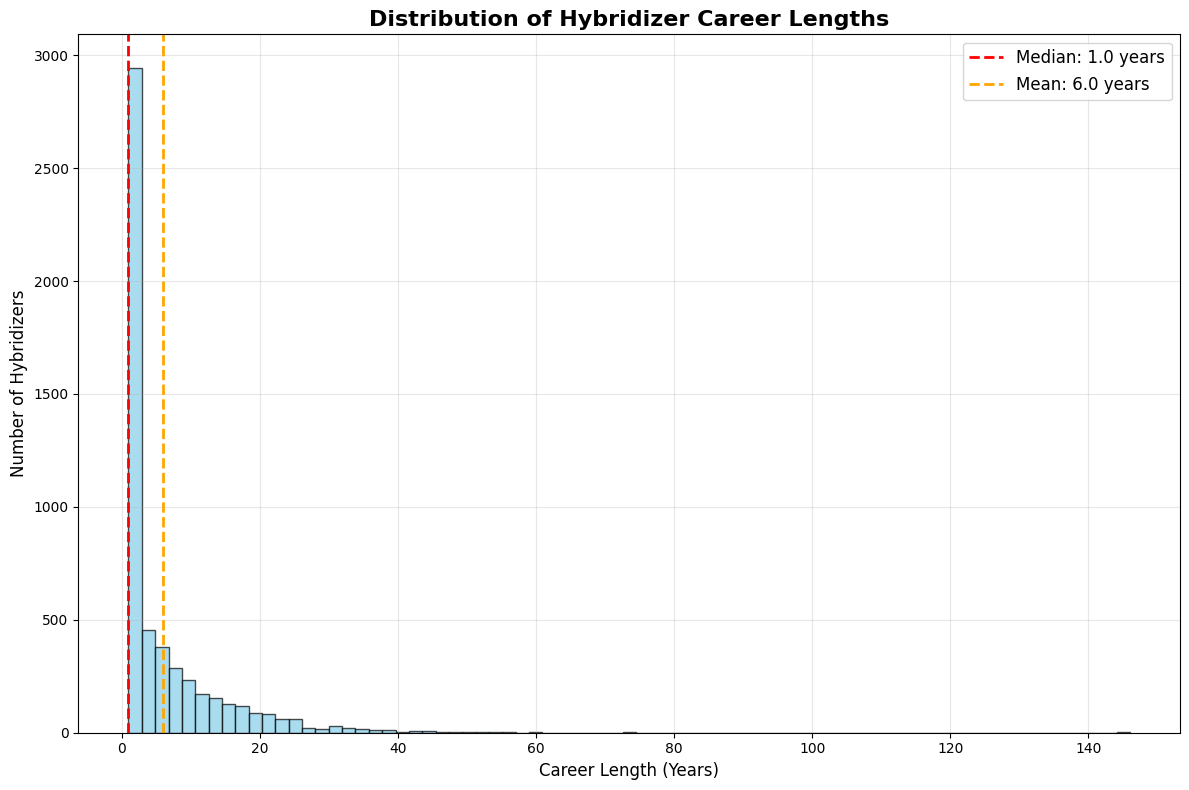


Career Length Insights:
50% of hybridizers have careers spanning 1.0 year(s)
Only 25% have careers longer than 8.0 years
Longest career: 146 years


In [27]:
# Career length patterns
career_lengths = lifetime_stats['career_span']

print("Career Length Statistics:")
print(career_lengths.describe())

# Histogram of career lengths
plt.figure(figsize=(12, 8))
plt.hist(career_lengths, bins=75, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(career_lengths.median(), color='red', linestyle='--', linewidth=2, 
            label=f'Median: {career_lengths.median()} years')
plt.axvline(career_lengths.mean(), color='orange', linestyle='--', linewidth=2, 
            label=f'Mean: {career_lengths.mean():.1f} years')

plt.title('Distribution of Hybridizer Career Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Career Length (Years)', fontsize=12)
plt.ylabel('Number of Hybridizers', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nCareer Length Insights:")
print(f"50% of hybridizers have careers spanning {career_lengths.median()} year(s)")
print(f"Only 25% have careers longer than {career_lengths.quantile(0.75)} years")
print(f"Longest career: {career_lengths.max()} years")

Average Introductions by Career Year:


,career_year,name,hybridizer,avg_introductions
0,1,13194,5334,2.47
1,2,5505,1180,4.67
2,3,5250,1156,4.54
3,4,5373,1055,5.09
4,5,4920,1004,4.90
5,6,4759,882,5.40
6,7,4657,820,5.68
7,8,4671,760,6.15
8,9,4137,654,6.33
9,10,4150,648,6.40


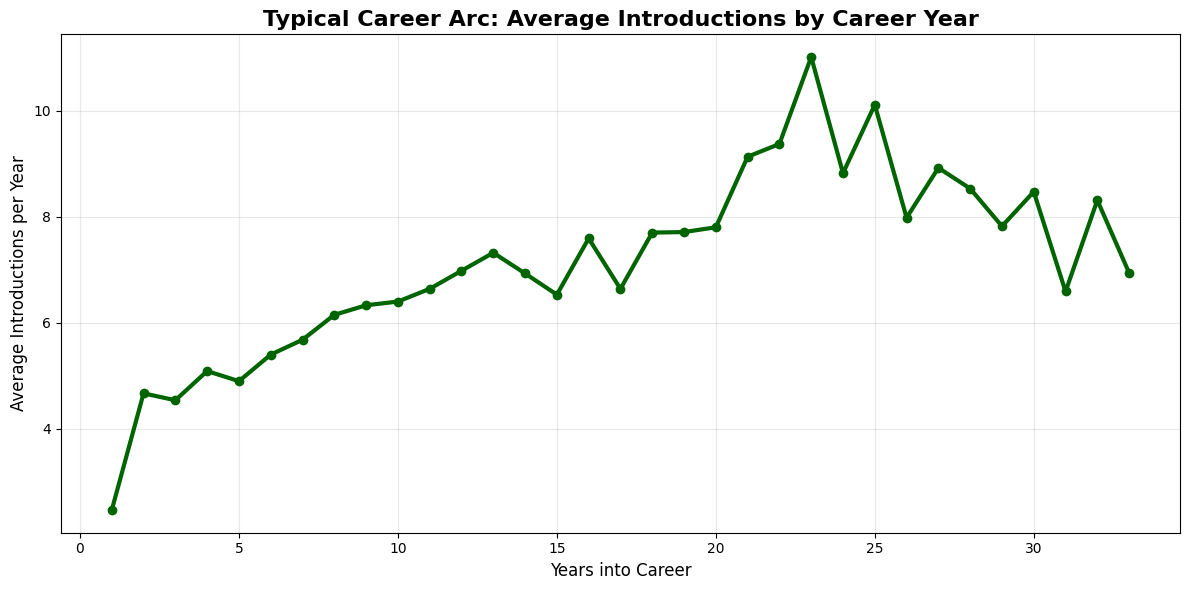

In [28]:
# Career year for each introduction
hybridizer_starts = df.groupby('hybridizer')['year'].min()
df_career = df.copy()
df_career['career_year'] = df_career.apply(
    lambda x: x['year'] - hybridizer_starts[x['hybridizer']] + 1, axis=1
)

# Average introductions by career year
career_progression = df_career.groupby('career_year').agg({
    'name': 'count',
    'hybridizer': 'nunique'
}).reset_index()

career_progression['avg_introductions'] = (
    career_progression['name'] / career_progression['hybridizer']
).round(2)

# Filter for meaningful sample sizes (at least 50 hybridizers)
career_progression = career_progression[career_progression['hybridizer'] >= 50]

# Show first 15 years
print("Average Introductions by Career Year:")
display(career_progression.head(15))

# Visualize career arc
plt.figure(figsize=(12, 6))
plt.plot(career_progression['career_year'], career_progression['avg_introductions'], 
         marker='o', linewidth=3, markersize=6, color='darkgreen')

plt.title('Typical Career Arc: Average Introductions by Career Year', fontsize=16, fontweight='bold')
plt.xlabel('Years into Career', fontsize=12)
plt.ylabel('Average Introductions per Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Most hybridizer careers are brief - 50% last only 1 year. However, those who persist see their productivity grow over time, with peak performance not typically occurring until they are atleast 15 years into the program

### Modern vs. Historical Hybridizers 
How have hybridizers patterns changed over time?

In [29]:
# Define modern era (last 30 years)
modern_cutoff = df['year'].max() - 30
print(f"Modern Era: {modern_cutoff}-{df['year'].max()}")
print(f"Historical Era: {df['year'].min()}-{modern_cutoff-1}")

# Categorize hybridizers by era
modern_hybridizers = set(df[df['year'] >= modern_cutoff]['hybridizer'].unique())
historical_hybridizers = set(df[df['year'] < modern_cutoff]['hybridizer'].unique())

# Remove overlap (active in both periods)
overlap_hybridizers = modern_hybridizers.intersection(historical_hybridizers)
pure_modern = modern_hybridizers - historical_hybridizers
pure_historical = historical_hybridizers - modern_hybridizers

print(f"\nEra Breakdown:")
print(f"Pure Modern hybridizers: {len(pure_modern):,}")
print(f"Pure Historical hybridizers: {len(pure_historical):,}")
print(f"Active in both periods: {len(overlap_hybridizers):,}")

Modern Era: 1994-2024
Historical Era: 1762-1993

Era Breakdown:
Pure Modern hybridizers: 3,109
Pure Historical hybridizers: 1,896
Active in both periods: 329


In [30]:
def calculate_era_career_arc(hybridizer_set, era_name):
    """Calculate career progression for a set of hybridizers"""
    era_data = df[df['hybridizer'].isin(hybridizer_set)].copy()
    
    # Calculate career years
    hybridizer_starts = era_data.groupby('hybridizer')['year'].min()
    era_data['career_year'] = era_data.apply(
        lambda x: x['year'] - hybridizer_starts[x['hybridizer']] + 1, axis=1
    )
    
    # Calculate average by career year
    career_stats = era_data.groupby('career_year').agg({
        'name': 'count',
        'hybridizer': 'nunique'
    }).reset_index()
    
    career_stats['avg_introductions'] = (
        career_stats['name'] / career_stats['hybridizer']
    ).round(2)
    
    career_stats.columns = ['career_year', 'total_intros', 'hybridizers', f'{era_name}_avg']
    return career_stats[['career_year', f'{era_name}_avg']]

# Calculate for both eras
modern_arc = calculate_era_career_arc(pure_modern, 'modern')
historical_arc = calculate_era_career_arc(pure_historical, 'historical')

# Merge for comparison
era_comparison = modern_arc.merge(historical_arc, on='career_year', how='outer')

# Show first 15 years
print("Career Arc Comparison (First 15 Years):")
display(era_comparison.head(15))

Career Arc Comparison (First 15 Years):


,career_year,modern_avg,historical_avg
0,1,2.53,2.30
1,2,4.91,4.23
2,3,4.77,4.14
3,4,5.59,3.96
4,5,5.11,4.20
5,6,5.79,4.12
6,7,6.17,4.43
7,8,6.27,5.27
8,9,6.42,5.35
9,10,6.47,5.88


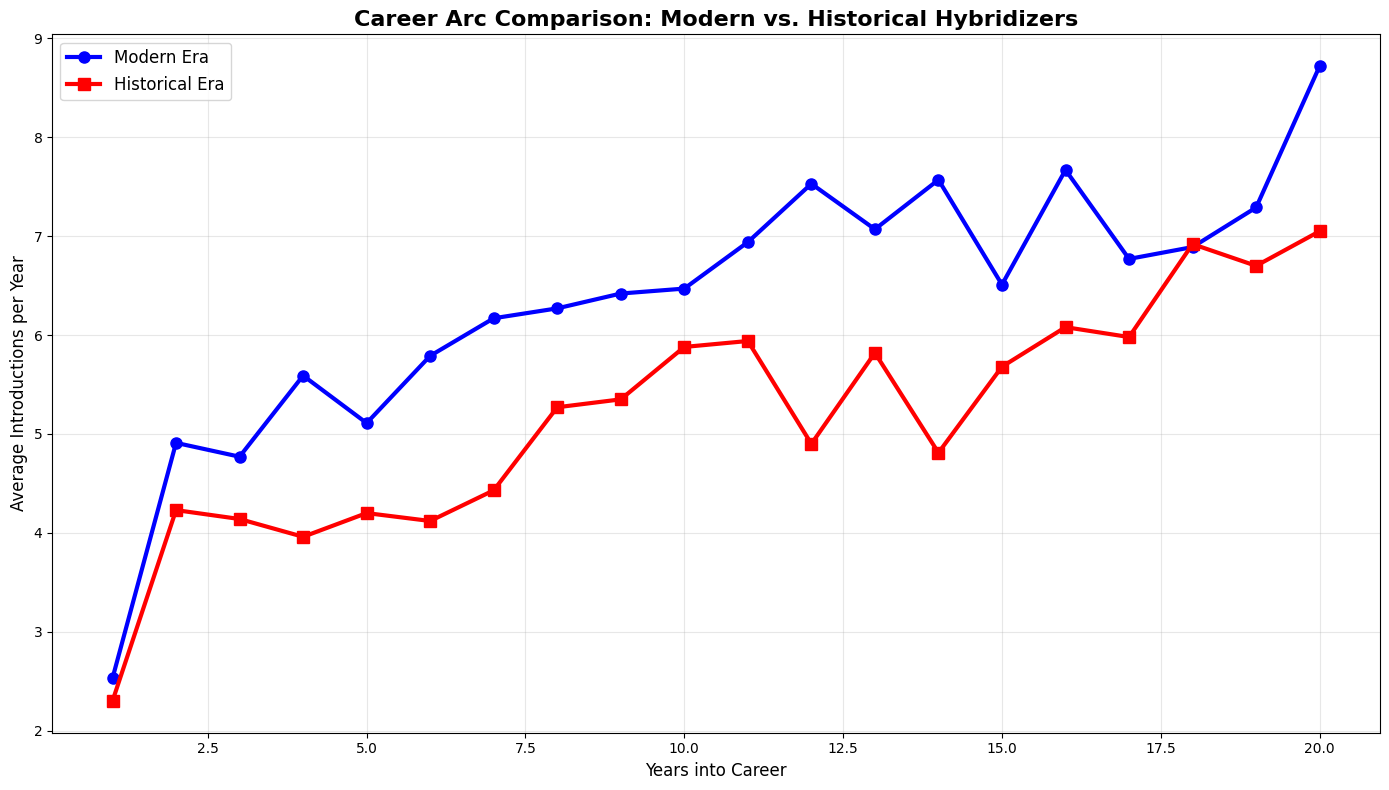

In [31]:
# Plot comparison of career arcs
plt.figure(figsize=(14, 8))

# Limit to first 20 years for clarity
comparison_data = era_comparison.head(20)

plt.plot(comparison_data['career_year'], comparison_data['modern_avg'], 
         marker='o', linewidth=3, markersize=8, label='Modern Era', color='blue')
plt.plot(comparison_data['career_year'], comparison_data['historical_avg'], 
         marker='s', linewidth=3, markersize=8, label='Historical Era', color='red')

plt.title('Career Arc Comparison: Modern vs. Historical Hybridizers', 
          fontsize=16, fontweight='bold')
plt.xlabel('Years into Career', fontsize=12)
plt.ylabel('Average Introductions per Year', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# Calculate key metrics for each era
def get_era_metrics(career_data, era_name):
    metrics = {
        'era': era_name,
        'peak_year': career_data.head(20).idxmax().iloc[1],
        'peak_avg': career_data.head(20).max().iloc[1],
        'first_5_avg': career_data.head(5).iloc[:, 1].mean(),
        'first_10_avg': career_data.head(10).iloc[:, 1].mean()
    }
    return metrics

modern_metrics = get_era_metrics(modern_arc, 'Modern')
historical_metrics = get_era_metrics(historical_arc, 'Historical')

metrics_df = pd.DataFrame([modern_metrics, historical_metrics])
print("Era Comparison - Key Metrics:")
display(metrics_df)

# Calculate improvement percentages
print(f"\nModern Era Improvements:")
print(f"Early career productivity (first 5 years): {((modern_metrics['first_5_avg'] - historical_metrics['first_5_avg']) / historical_metrics['first_5_avg'] * 100):+.1f}%")
print(f"Peak productivity: {((modern_metrics['peak_avg'] - historical_metrics['peak_avg']) / historical_metrics['peak_avg'] * 100):+.1f}%")

Era Comparison - Key Metrics:


,era,peak_year,peak_avg,first_5_avg,first_10_avg
0,Modern,19,8.72,4.582,5.403
1,Historical,19,7.05,3.766,4.388



Modern Era Improvements:
Early career productivity (first 5 years): +21.7%
Peak productivity: +23.7%


Modern hybridizers are significantly more productive than their historical counterparts. They introduce 22% more varieties in their first 5 years and achieve 24% higher peak productivity, suggesting improved breeding techniques and efficiency.

The Evolution of Daylily Hybridizing
Key Findings
1. Community Consolidation

The hybridizing community has been shrinking since 2010
Net loss of ~600 hybridizers in the 2020s
Peak activity occurred in 2011 with 485 active hybridizers

2. Elite Dominance

Top 4% of hybridizers (100+ varieties) drive most innovation
Wild leads with 1,837 varieties over 73 years
Krekler holds the single-year record: 395 varieties in 1987

3. Career Patterns

50% of hybridizers have 1-year careers
Those who persist see growing productivity over time
Peak performance typically occurs 15-20 years into career

4. Modern Efficiency

Modern hybridizers are 22% more productive early in their careers
Peak productivity has increased by 24% compared to historical levels
Improved techniques and methods drive higher output

The Big Picture
The data reveals a transformation from a widespread hobby to a specialized craft. While fewer people are entering the field, those who remain are more productive and efficient than ever before. The future of daylily hybridizing appears to rest in the hands of a smaller but highly skilled group of dedicated breeders.
